In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [57]:
# Reading the csv file.

train=pd.read_csv('bigdatamart_Train.csv')
train.shape

(8523, 12)

In [58]:
# Reading the csv file.
test=pd.read_csv('bigdatamart_Test.csv')
test.shape

(5681, 11)

In [59]:
# Combining both train and test data together
df = pd.concat([train, test])
df.shape

(14204, 12)

In [60]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
5677,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
5678,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN
5679,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN


In [61]:
# Checking which all columns have null values
df.isnull().sum().sort_values(ascending=False)

Item_Outlet_Sales            5681
Outlet_Size                  4016
Item_Weight                  2439
Outlet_Type                     0
Outlet_Location_Type            0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Item_MRP                        0
Item_Type                       0
Item_Visibility                 0
Item_Fat_Content                0
Item_Identifier                 0
dtype: int64

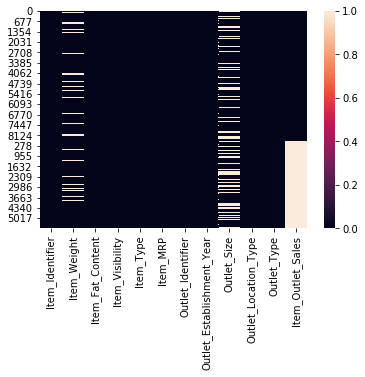

In [62]:
# Checking for null using HeatMap
sns.heatmap(df.isnull())

In [63]:
# Adding missing data
# Item_Outlet_Sales would be our target variable so excluding it.

print("Item_Weight ",df['Item_Weight'].median())    
df.fillna({'Item_Weight':df['Item_Weight'].median()}, inplace=True)
print("POST update Item_Weight null count: ",df["Item_Weight"].isnull().sum())

for i in df['Outlet_Size'].isnull():
    df.fillna({'Outlet_Size':'Medium'}, inplace=True)

print("POST update Outlet_Size null count: ",df["Outlet_Size"].isnull().sum())

Item_Weight  12.6
POST update Item_Weight null count:  0
POST update Outlet_Size null count:  0


In [64]:
# Checking which all columns have null values
df.isnull().sum().sort_values(ascending=False)
#data.describe()

Item_Outlet_Sales            5681
Outlet_Type                     0
Outlet_Location_Type            0
Outlet_Size                     0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Item_MRP                        0
Item_Type                       0
Item_Visibility                 0
Item_Fat_Content                0
Item_Weight                     0
Item_Identifier                 0
dtype: int64

In [65]:
from sklearn.preprocessing import LabelEncoder 
  
#le = LabelEncoder() 
#data= le.fit_transform(data) 
#data

data=df.apply(LabelEncoder().fit_transform)

In [66]:
# Setting x by excluding Class column which is y here
x=data.drop(['Item_Outlet_Sales'],axis=1)
x

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,284,1,1097,4,7567,9,4,1,0,1
1,8,57,2,1436,14,632,3,8,1,2,2
2,662,375,1,1172,10,3897,9,4,1,0,1
3,1121,392,2,0,6,5626,0,3,1,2,0
4,1297,265,1,0,9,848,1,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5676,233,298,2,718,13,3881,8,2,2,0,1
5677,308,180,2,11820,15,5069,3,8,1,2,2
5678,1426,293,1,8009,8,3196,7,5,1,1,1
5679,521,353,2,0,3,6626,2,7,1,1,1


In [67]:
# Settting y as Class column
y=data['Item_Outlet_Sales']
y

0       2540
1        422
2       1639
3        670
4        865
        ... 
5676    5380
5677    5379
5678    5378
5679    7282
5680    9173
Name: Item_Outlet_Sales, Length: 14204, dtype: int64

In [68]:

max_score=0
for r_state in range(42,101):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.25,random_state=r_state)
    lm=LinearRegression()
    lm.fit(train_x,train_y)
    pred=lm.predict(test_x)
    score=lm.score(x,y)
    #print("Score corresponding to r_state: ",r_state," is ",score)
    if(score>max_score):
        max_score=score
        final_rstate=r_state
        
print("\n")
print("Max_accuracy_Score corresponding to final_r_state: ",final_rstate," is ",max_score)



Max_accuracy_Score corresponding to final_r_state:  100  is  0.02446640240179332


In [69]:
# Setting the test x & y values
# Setting the train x & y values
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.25,random_state=59)

In [70]:
train_x.shape

(10653, 11)

In [71]:
train_y.shape

(10653,)

In [72]:
test_x.shape

(3551, 11)

In [73]:
test_y.shape

(3551,)

In [74]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [75]:
KNN=KNeighborsRegressor(n_neighbors=6)
SV=SVR()
LR=LinearRegression()
DT=DecisionTreeRegressor(random_state=6)
LS = Lasso(alpha=0.001)
RD = Ridge(alpha=0.01)
EL = ElasticNet(alpha=0.001)
RF = RandomForestRegressor(n_estimators=200,random_state=88)
AD = AdaBoostRegressor()
GB = GradientBoostingRegressor()

In [76]:
models=[]
models.append(('KNeighborsRegressor',KNN))
models.append(('SVR',SV))
models.append(('LinearRegression',LR))
models.append(('DecisionTreeRegressor',DT))
models.append(('Lasso',LS))
models.append(('Ridge',RD))
models.append(('ElasticNet',EL))
models.append(('RandomForestRegressor',RF))
models.append(('AdaBoostRegressor',AD))
models.append(('GradientBoostingRegressor',GB))

In [77]:
Model=[]
score=[]
mae=[]
mse=[]
rmae=[]

for name,model in models:
    print("--------------",name,"--------------")
    Model.append(name)
    model.fit(train_x,train_y)
    print(model)
    pre=model.predict(test_x)
    
    # Metrics
    m1=mean_absolute_error(test_y,pred)
    print("Mean absolute error",m1)
    mae.append(m1)
           
    m2=mean_squared_error(test_y,pred)
    print("Mean squared error",m2)
    mse.append(m2)
    
    
    m3=np.sqrt(mean_squared_error(test_y,pred))
    print("Root Mean absolute error",m3)
    rmae.append(m3)
    
    #Model performance
    modelscore=model.score(test_x,test_y)
    print("Score: ",modelscore )
    score.append(modelscore*100)
    
    print("\n")

-------------- KNeighborsRegressor --------------
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                    weights='uniform')
Mean absolute error 2339.044808633173
Mean squared error 7437194.014785904
Root Mean absolute error 2727.121928844749
Score:  -0.11642758309403489


-------------- SVR --------------
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
Mean absolute error 2339.044808633173
Mean squared error 7437194.014785904
Root Mean absolute error 2727.121928844749
Score:  -0.11934038074340414


-------------- LinearRegression --------------
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Mean absolute error 2339.044808633173
Mean squared error 7437194.014785904
Root Mean absolute error 2727.121928844749
Score:  0.02853507634167085


----------

In [78]:
result=pd.DataFrame({"Model": Model, "Score": score})
result

,Model,Score
0,KNeighborsRegressor,-11.642758
1,SVR,-11.934038
2,LinearRegression,2.853508
3,DecisionTreeRegressor,-93.736905
4,Lasso,2.853507
5,Ridge,2.853507
6,ElasticNet,2.853336
7,RandomForestRegressor,-6.647994
8,AdaBoostRegressor,0.530145
9,GradientBoostingRegressor,2.219210


# I choose LinearRegression Model based on the stats above.

In [79]:
# Saving the model

from sklearn.externals import joblib
joblib.dump(LR,"LR_BigData.pkl")

['LR_BigData.pkl']